Best k Value and Score
k        23.000000
Score     0.964912
Name: 22, dtype: float64


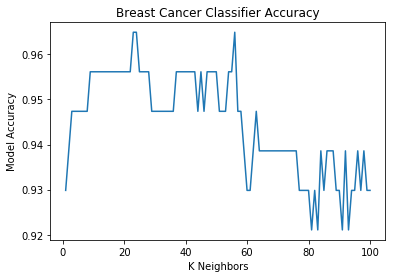

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

breast_cancer_data = load_breast_cancer()

# train/test split
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=100)

# loop through k to select optimum score
k=[]
for i in range(1, 101):
    # initialize the classifier with argument n_neighbors equal to the index of the loop
    classifier = KNeighborsClassifier(n_neighbors = i)
    # fit the classifier to the training data and labels
    classifier.fit(training_data, training_labels)
    # score the model against the test data and labels
    score_i = classifier.score(validation_data,validation_labels)
    # append the results for each iteration to the k vector
    k.append([i, score_i]) 

# locate the maximum score and return the corresponding row with integer k
df = pd.DataFrame(k, columns=['k', 'Score'])
k_best = df.loc[df['Score'].idxmax()]
print("Best k Value and Score")
print(k_best)

# split the k vector to plot it
x_vals = [i[0] for i in k]
y_vals = [i[1] for i in k]

plt.plot(x_vals, y_vals)
plt.xlabel("K Neighbors")
plt.ylabel("Model Accuracy")
plt.title("Breast Cancer Classifier Accuracy")

plt.show()